In [2]:
import modeller
from modeller import *
from modeller.scripts import complete_pdb
import pandas as pd
import matplotlib.pyplot as plt
import os

In [15]:
os.getcwd()

'/home/pc-usach-cm/Escritorio/tcaceres/estructura/MODELLER'

In [20]:
# Assess DOPE

log.verbose()    # request verbose output
env = Environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# read model pdb file

model_pdb = '3v5e_fill.BL00010005.pdb'
mdl = complete_pdb(env, model_pdb)

# Assess with DOPE:
s = Selection(mdl)   # all atom selection
s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file=model_pdb.replace('pdb', 'profile'),
              normalize_profile=True, smoothing_window=15)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL10v5}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL10v5}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85691565   83683.172    81.722

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85692093   83683.688    81.722
openf___224_> Open           ${MODINSTALL10v5}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85740693   83731.148    81.769
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL10v5}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85753993   83744.133    81.781
openf___224_> Open           $

-235742.609375

In [ ]:
# Assess DOPE for several models

#log.verbose()    # request verbose output
env = Environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# read model pdb file

model_id = '3v5e_fill'
N_models = 5

for i in range(1, N_models + 1):
    
    mdl = complete_pdb(env, './{}.BL0001000{}.pdb'.format(model_id, N_models))

    # Assess with DOPE:
    #s = Selection(mdl)   # all atom selection
    zscore = mdl.assess_normalized_dope()
    print('Z-score Model {}.BL00001000{}.pdb: {}'.format(model_id, i, zscore))

In [4]:
#Modified from plot_profiles.py by Tomás Caceres <caceres.tomas@uc.cl>

#Script to write a profile csv file, which can be used to plot with Python or R

#Usage example
#python3 data_profile.py > file.log

def get_profile(profile_file):
    """Read `profile_file` into a Python array, and add gaps corresponding to
       the alignment sequence `seq`."""
    # Read all non-comment and non-blank lines from the file:
    f = open(profile_file)
    vals = []
    for line in f:
        if not line.startswith('#') and len(line) > 10:
            spl = line.split()
            vals.append(float(spl[-1]))
    return vals


profile_file = './modeller/AFB5.B99990038_noDegron_minimized.profile'

scores = get_profile(profile_file)
indexes = [x for x in range(1, len(scores) +1)]

dictionary = {
                'res': indexes,
	            'scores': scores
            }


df = pd.DataFrame(dictionary)

df.to_csv('AFB5.B99990038_noDegron_minimized.profile.csv', index=False)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL10v5}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL10v5}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85864737   83852.281    81.887

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85865265   83852.797    81.887
openf___224_> Open           ${MODINSTALL10v5}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85913865   83900.258    81.934
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL10v5}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     85927165   83913.250    81.947
openf___224_> Open           $

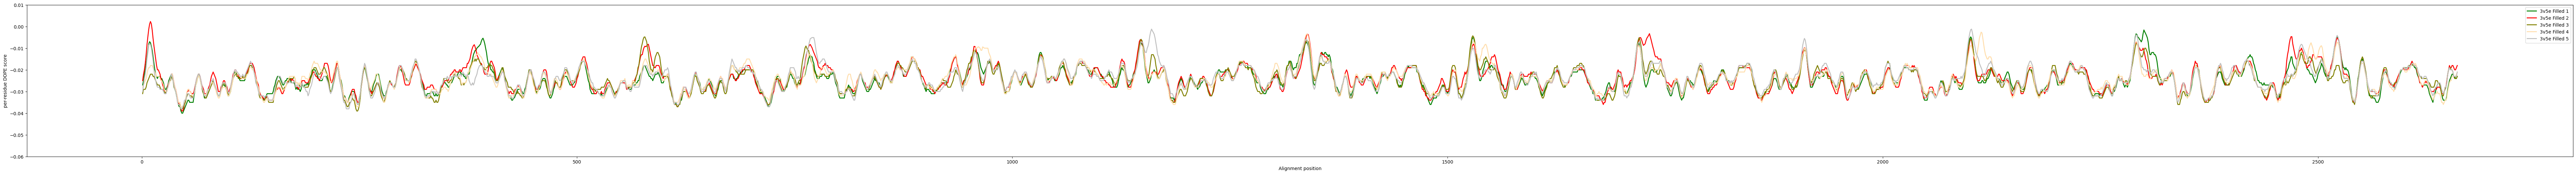

In [30]:
# Plot profiles

def r_enumerate(seq):
    """Enumerate a sequence in reverse order"""
    # Note that we don't use reversed() since Python 2.3 doesn't have it
    num = len(seq) - 1
    while num >= 0:
        yield num, seq[num]
        num -= 1

def get_profile(profile_file, seq):
    """Read `profile_file` into a Python array, and add gaps corresponding to
       the alignment sequence `seq`."""
    # Read all non-comment and non-blank lines from the file:
    f = open(profile_file)
    vals = []
    for line in f:
        if not line.startswith('#') and len(line) > 10:
            spl = line.split()
            vals.append(float(spl[-1]))
    # Insert gaps into the profile corresponding to those in seq:
    for n, res in r_enumerate(seq.residues):
        for gap in range(res.get_leading_gaps()):
            vals.insert(n, None)
    # Add a gap at position '0', so that we effectively count from 1:
    vals.insert(0, None)
    return vals



e = modeller.Environ()
# Archivo PIR con el alineamiento. Dado que ocupé la misma secuencia para MODELLER como para AF, utilizo ese mismo alineamiento
a = modeller.Alignment(e, file='alignment_2.ali')

#template = get_profile('./multiple_template/degron_canonico/modelos/2p1q_B.profile', a['2p1q_B'])

# Ojo aquí. a['AFB5'] se debe mantener. El archivo .profile debe cambiarse para usar los de AF si asi se requiere
filled_1 = get_profile('3v5e_fill.BL00010001.profile', a['3v5e_fill'])
filled_2 = get_profile('3v5e_fill.BL00010002.profile', a['3v5e_fill'])
filled_3 = get_profile('3v5e_fill.BL00010003.profile', a['3v5e_fill'])
filled_4 = get_profile('3v5e_fill.BL00010004.profile', a['3v5e_fill'])
filled_5 = get_profile('3v5e_fill.BL00010005.profile', a['3v5e_fill'])


# Plot the template and model profiles in the same plot for comparison:
plt.figure(1, figsize=(100,6))
plt.xlabel('Alignment position')
plt.ylabel('per-residue DOPE score')
plt.plot(filled_1, color='green', linewidth=2, label='3v5e Filled 1')
plt.plot(filled_2, color='red', linewidth=2, label='3v5e Filled 2')
plt.plot(filled_3, color='olive', linewidth=2, label='3v5e Filled 3')
plt.plot(filled_4, color='navajowhite', linewidth=2, label='3v5e Filled 4')
plt.plot(filled_5, color='silver', linewidth=2, label='3v5e Filled 5')
plt.ylim([-0.06, 0.01])
plt.legend()
plt.savefig('AFs vs Modeller', dpi=300)